# Customer Segmentation
### Machine Learning II Project
- Bruno Moreira
- Carolina Braziel Shaul 
- Madalena Frango

#### 1. Importing Data & Libraries

In [1]:
#Basic Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#To find addresses
import reverse_geocoder as rg
from geopy.geocoders import Nominatim

#Plot Maps
import folium
from folium.plugins import HeatMap, MarkerCluster 

#Functions
import Functions

In [2]:
customers = pd.read_csv('Customer Info Dataset.csv')
transactions = pd.read_csv('Customer Basket Dataset.csv')
prod_mapping = pd.read_excel('Product Mapping Excel File.xlsx')

## Customers Dataset Analysis

#### 2. Preprocessing: Data Cleaning, Feature Extraction and Feature Selection.

**Verifying duplicates**

In [3]:
customers[customers['customer_id'].duplicated() == True]

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude


In [73]:
customers.set_index('customer_id', inplace=True)

In [74]:
customers[customers.duplicated() == True]

,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
customer_id,,,,,,,,,,,,,,,,,,,,,


 **Summary Statistics**

In [75]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
kids_home,30000.0,1.146700e+00,1.234111,0.000000e+00,0.000000,1.000000,1.000000,10.000000
teens_home,30000.0,5.129333e-01,0.912502,0.000000e+00,0.000000,0.000000,1.000000,9.000000
number_complaints,30000.0,7.643667e-01,0.836341,0.000000e+00,0.000000,1.000000,1.000000,9.000000
distinct_stores_visited,30000.0,6.120767e+00,6.511410,0.000000e+00,2.000000,3.000000,8.000000,21.000000
lifetime_spend_groceries,30000.0,3.978634e+03,5280.641466,0.000000e+00,220.000000,950.000000,5253.000000,18852.000000
lifetime_spend_electronics,30000.0,9.652388e+02,1755.323397,1.058527e+00,45.000000,194.000000,721.000000,6603.000000
typical_hour,30000.0,-inf,NaN,-inf,9.000000,14.000000,20.000000,23.000000
lifetime_spend_vegetables,30000.0,5.642078e+02,481.819086,1.000000e+00,247.000000,425.000000,785.000000,1568.000000
lifetime_spend_nonalcohol_drinks,30000.0,6.287501e+02,496.346400,0.000000e+00,244.000000,425.000000,949.000000,1671.000000
lifetime_spend_alcohol_drinks,30000.0,3.793445e+02,236.206400,0.000000e+00,193.000000,419.000000,537.000000,1048.000000


> Some weird patterns can be detected above: both variables *typical_hour* and *lifetime_spend_videogames* possess infinite values, which given their context, conditions their interpretation. Below, a more in-depth analysis of these features is done.

In [76]:
customers[customers['lifetime_spend_videogames'] == -np.inf]

,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
customer_id,,,,,,,,,,,,,,,,,,,,,
1441,Fausto`s Supermarket,male,01/23/1989 11:26 AM,0.0,0.0,0.0,1.0,2.678482,1.095507,0.575646,...,2.613335,34425.0,1.556140,-inf,0.978006,0.199261,2008.0,961221.0,38.866242,-9.110871
3399,Sandy`s Supermarket,female,07/11/1970 12:57 PM,0.0,0.0,0.0,1.0,2.797932,1.141087,0.447940,...,2.623429,36152.0,1.555148,-inf,0.997246,0.201933,2009.0,NaN,38.866366,-9.111207
8086,Eugene`s Supermarket,male,02/29/1956 08:26 PM,0.0,0.0,0.0,1.0,2.802438,1.146242,0.173287,...,2.612483,34777.0,1.530623,-inf,0.951666,0.210895,2010.0,NaN,38.865887,-9.111353
9706,Michele`s Supermarket,female,12/06/1962 02:12 AM,0.0,0.0,0.0,1.0,2.844843,1.184050,0.708303,...,2.615854,35000.0,1.555148,-inf,0.997246,0.200211,2009.0,NaN,38.866273,-9.111174
17805,Robert`s Supermarket,male,09/22/1982 03:36 AM,0.0,0.0,0.0,1.0,2.751432,1.127715,0.599474,...,2.619223,35809.0,1.553152,-inf,1.006338,0.195712,2008.0,NaN,38.866607,-9.111206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,Justin`s Supermarket,male,03/20/1959 03:59 PM,0.0,0.0,0.0,1.0,2.741558,1.113587,0.621227,...,2.613508,34834.0,1.552650,-inf,0.967800,0.203212,2011.0,NaN,38.866031,-9.111438
16270,Melissa`s Supermarket,female,05/11/1996 05:49 AM,0.0,0.0,0.0,1.0,2.768803,1.175120,0.519860,...,2.619885,34631.0,1.571034,-inf,0.987811,0.198526,2008.0,NaN,38.865962,-9.110773
10262,Francis`s Supermarket,male,11/05/1970 01:58 AM,0.0,0.0,0.0,1.0,2.788190,1.130447,0.693147,...,2.621949,34708.0,1.553152,-inf,0.957160,0.191255,2010.0,NaN,38.866438,-9.111502


In [77]:
customers[customers['typical_hour'] == -np.inf]

,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
customer_id,,,,,,,,,,,,,,,,,,,,,
8592,Charles`s Supermarket,male,01/18/1988 04:13 AM,0.0,0.0,0.0,1.0,2.64414,1.130447,-inf,...,2.615969,35005.0,1.540302,-inf,0.95716,0.196409,2013.0,NaN,38.866685,-9.111366
101,Annie`s Supermarket,female,11/23/1947 10:33 AM,0.0,0.0,0.0,1.0,2.65918,1.133150,-inf,...,2.608573,34702.0,1.553652,-inf,0.91589,0.194451,2009.0,910065.0,38.866048,-9.111718


> It seems that this particularity solely applies to customers who have present in their name "Supermarket". For this reason, we will perform a separate analysis to this group, and correct these values. For the variable *lifetime_spend_videogames*, the infinite values will be interpreted as "non-applicable" and thus, will be equal to 0. In the case of *typical_hour*, the mean value of the other observations within this group will be imputed.

In [4]:
customers['lifetime_spend_videogames'] = np.where(customers['lifetime_spend_videogames'] == -np.inf, 0, customers['lifetime_spend_videogames'])

In [5]:
imputed_value = customers[(customers['customer_name'].str.contains('Supermarket')) & (customers['typical_hour'] != -np.inf)]['typical_hour'].mean()

In [6]:
customers['typical_hour'] = np.where(customers['typical_hour'] == -np.inf, imputed_value, customers['typical_hour'])

In [7]:
(customers[customers['customer_name'].str.contains('Supermarket')]).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,226.0,14358.973451,8591.381085,46.000000,6886.250000,14166.500000,21357.500000,29953.000000
kids_home,226.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
teens_home,226.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
number_complaints,226.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
distinct_stores_visited,226.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
lifetime_spend_groceries,226.0,2.701444,0.057132,2.423006,2.669260,2.707140,2.741420,2.844843
lifetime_spend_electronics,226.0,1.149498,0.026245,1.058527,1.130447,1.151293,1.165860,1.222587
typical_hour,226.0,0.625775,0.154783,0.000000,0.575646,0.693147,0.722593,0.783874
lifetime_spend_vegetables,226.0,2.124160,0.026242,2.042546,2.105281,2.126912,2.143535,2.183680
lifetime_spend_nonalcohol_drinks,226.0,2.302082,0.012521,2.266444,2.293678,2.303334,2.309999,2.334485


> As it is possible to perceive, the Supermarket Group has a very distinct behaviour: the standard deviation for many variables either is or tends to 0, meaning that this is quite a homogeneous selection of observations.

 **Correcting Missing Values and Features dtypes**

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              30000 non-null  int64  
 1   customer_name                            30000 non-null  object 
 2   customer_gender                          30000 non-null  object 
 3   customer_birthdate                       30000 non-null  object 
 4   kids_home                                30000 non-null  float64
 5   teens_home                               30000 non-null  float64
 6   number_complaints                        30000 non-null  float64
 7   distinct_stores_visited                  30000 non-null  float64
 8   lifetime_spend_groceries                 30000 non-null  float64
 9   lifetime_spend_electronics               30000 non-null  float64
 10  typical_hour                             30000

> There exist missing values solely in the feature *loyalty_card_number*, which can translate as "non-applicable" (the individual has no loyalty card associated to them). In these cases, imputation should not be considered - and due to the percentage of observations within this condition and the meaning of this feature, it does not present great value. For this reason, it will be further used to create a binary variable indicating whether the customer has a loyalty card or not. 

In [9]:
customers['customer_birthdate'] = pd.to_datetime(customers['customer_birthdate'])
Functions.integer_convert(customers, ['number_complaints', 'kids_home', 'teens_home', 'distinct_stores_visited', 'lifetime_total_distinct_products', 'year_first_transaction'])

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,female,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,...,53.0,48.0,47.0,105.0,85,0.192154,2017,NaN,38.754263,-9.163397
1,19330,Donald Robertson,male,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,...,86.0,80.0,45.0,1964.0,85,0.098647,2015,NaN,38.777761,-9.156197
2,2272,Phd. Felicia Bradshaw,female,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,...,204.0,170.0,46.0,5.0,408,0.497251,2008,NaN,38.785329,-9.127113
3,25288,Emma Williams,female,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,...,1081.0,1068.0,617.0,1078.0,1956,0.206713,2010,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,female,2000-01-31 11:43:00,0,0,0,2,82.0,22.0,...,39.0,39.0,48.0,103.0,83,0.200625,2015,NaN,38.756024,-9.162970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Phd. Karen Watts,female,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,...,21.0,11.0,57.0,1984.0,112,0.096366,2008,935162.0,38.734446,-9.171911
29996,26447,Curtis Thompson,male,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,...,47.0,41.0,50.0,197.0,22,0.118998,2014,NaN,38.767070,-9.144301
29997,182,Richard Carter,male,2001-01-14 05:49:00,0,0,0,2,83.0,23.0,...,55.0,52.0,51.0,94.0,77,0.199432,2016,953891.0,38.728487,-9.164140
29998,13768,Jerry Yoder,male,1958-08-21 12:12:00,1,0,1,20,391.0,20.0,...,160.0,132.0,54.0,5.0,398,0.494527,2006,NaN,38.751123,-9.182512


**Feature Extraction**

Several features will be created. Some solely for the individual customers (non-supermarket), while others for all observations. Their descriptions follow:

_For individual clients_:

- **minors_household**: Number of minors present in the household.
- **education**: Individual's Education Level.
- **birthday**: Individual's day of birth.
- **birthmonth**: Individual's month of birth.
- **birthyear**: 'Individual's year of birth.

_For supermarkets_:

_For all customers_:
- **total_lifetime_spent**: Total lifetime amount spent.
- **loyalty_card**: Whether the customer has a loyalty card or not.
- **latitude_encoded**: Latitude of the municipality of residence of the customer.
- **longitude_encoded**: Longitude of the municipality of residence of the customer.

_Creating the features for all customers_

In [10]:
#Loyalty Card
Functions.binary_encoding(df = customers, col_name = 'loyalty_card', 
                          condition = (np.isnan(customers['loyalty_card_number']) == True))


customers['total_lifetime_spend'] = customers[['lifetime_spend_groceries',
       'lifetime_spend_electronics','lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames']].sum(axis=1)


#customers['address'] = customers.apply(lambda row: Functions.get_address(row), axis=1)

**IGNORAR PASSOS INTERMÉDIOS**

In [85]:
# customers.to_csv('customers_location.csv', index=True)

In [86]:
customers2 = pd.read_csv('customers_location.csv')

In [87]:
customers2.set_index('customer_id', inplace=True)

In [88]:
customers = pd.concat([customers, customers2['address']], axis=1)

**DEIXAR DE IGNORAR**

In [95]:
customers['address2'] = customers['address'].apply(lambda row: Functions.clean_address(row))
Functions.encode_address(customers, 'latitude', 'longitude', 'address2')

,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,year_first_transaction,loyalty_card_number,latitude,longitude,loyalty_card,total_lifetime_spend,address,address2,latitude_encoded,longitude_encoded
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,female,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22.0,...,2017,NaN,38.754263,-9.163397,0,1434.0,"Estádio Universitário de Lisboa, Azinhaga das ...",Alvalade,38.753483,-9.150209
19330,Donald Robertson,male,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21.0,...,2015,NaN,38.777761,-9.156197,0,4064.0,"Avenida David Mourão-Ferreira, Bairro da Cruz ...",Lumiar,38.768825,-9.163826
2272,Phd. Felicia Bradshaw,female,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9.0,...,2008,NaN,38.785329,-9.127113,0,1336.0,"Rua Engenheiro Adão Manuel Ramos Barata, Sacav...",Loures,38.821176,-9.115956
25288,Emma Williams,female,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12.0,...,2010,NaN,38.744086,-9.156589,0,5676.0,"Rua Veloso Salgado, Bairro do Rego, Campo Pequ...",Avenidas Novas,38.737986,-9.152887
12829,Hilda Huerta,female,2000-01-31 11:43:00,0,0,0,2,82.0,22.0,21.0,...,2015,NaN,38.756024,-9.162970,0,1266.0,"Estádio Universitário de Lisboa, Azinhaga das ...",Alvalade,38.753483,-9.150209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,female,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20.0,...,2008,935162.0,38.734446,-9.171911,1,4047.0,"37ª Esquadra - Serafina, 25, Rua Miguel Ângelo...",Campolide,38.731599,-9.166279
26447,Curtis Thompson,male,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15.0,...,2014,NaN,38.767070,-9.144301,0,1165.0,"Terminal de Carga Aérea, Avenida Eugénio de An...",Olivais,38.772120,-9.128527
182,Richard Carter,male,2001-01-14 05:49:00,0,0,0,2,83.0,23.0,23.0,...,2016,953891.0,38.728487,-9.164140,1,1385.0,"OPTIMISTIC, Rua Campos Júnior, Bairro de Campo...",Campolide,38.731599,-9.166279


> To create the features for individuals only, we will separate the original dataset into two separate dataframes, one for each group.

In [97]:
supermarkets = customers[customers['customer_name'].str.contains('Supermarket')]

In [98]:
individuals = customers[~customers.isin(supermarkets)].dropna(how='all')

_Creating the features for individual customers and encoding data_

In [99]:
#Minors In Household
individuals['minors_in_household'] = (individuals[['kids_home', 'teens_home']]).sum(axis=1)

#Birthday, Birthmonth and Birthyear
Functions.process_birthdate(individuals, 'customer_birthdate')

#Education Level
individuals['education'] = individuals['customer_name'].apply(lambda row : Functions.extract_education(row))

#Encoding Gender Feature
Functions.binary_encoding(individuals, 'customer_gender', condition=(individuals['customer_gender'] == 'male'))

#Cleansing the customer's name
individuals['customer_name'] = individuals['customer_name'].apply(lambda row: Functions.clean_names(row))

**Initial Feature Selection**

aqui vamos apagar aquilo que achamos que devemos, mas acho q temos de conversar todos antes sobre o que é melhor apagar

In [100]:
individuals.columns

Index(['customer_name', 'customer_gender', 'customer_birthdate', 'kids_home',
       'teens_home', 'number_complaints', 'distinct_stores_visited',
       'lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card_number', 'latitude', 'longitude', 'loyalty_card',
       'total_lifetime_spend', 'address', 'address2', 'latitude_encoded',
       'longitude_encoded', 'minors_in_household', 'birthday', 'birthmonth',
       'birthyear', 'education'],
      dtype='object')

In [101]:
supermarkets.columns

Index(['customer_name', 'customer_gender', 'customer_birthdate', 'kids_home',
       'teens_home', 'number_complaints', 'distinct_stores_visited',
       'lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card_number', 'latitude', 'longitude', 'loyalty_card',
       'total_lifetime_spend', 'address', 'address2', 'latitude_encoded',
       'longitude_encoded'],
      dtype='object')

 Para uma exploração inicial, em relação aos grupo de individuos considero relevant apagar: customer_birthdate; loyalty_card_number, latitude, longitude, address. Estou indecisa se tiramos também kids_home, teens_home e address2. Acho que com a exploração podemos tirar uma conclusão.

 Quanto aos supermercados, retiraria as mesmas variaveis explicitas ai em cima mais os teen+kids+gender, mas nao compreendo oq explorar mais porque aos meus olhos ja se trata de um segmento. Não o analisaria com o objetivo de criar mais clusters mas apenas para descrever o cluster supermercados em si.


In [102]:
individuals.drop(['customer_birthdate', 'loyalty_card_number', 'latitude', 'longitude', 'address'], axis=1, inplace=True)
supermarkets.drop(['customer_birthdate', 'loyalty_card_number', 'latitude', 'longitude', 'address', 'teens_home', 'kids_home', 'customer_gender'], axis=1, inplace=True)


C:\Users\carolinashaul\AppData\Local\Temp\ipykernel_9524\1095695136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermarkets.drop(['customer_birthdate', 'loyalty_card_number', 'latitude', 'longitude', 'address', 'teens_home', 'kids_home', 'customer_gender'], axis=1, inplace=True)


**Final Conversion of dtypes**

In [103]:
Functions.integer_convert(individuals, ['number_complaints', 'kids_home', 'teens_home', 'distinct_stores_visited', 'lifetime_total_distinct_products', 'year_first_transaction', 'typical_hour', 'loyalty_card', 'minors_in_household', ])


,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,loyalty_card,total_lifetime_spend,address2,latitude_encoded,longitude_encoded,minors_in_household,birthday,birthmonth,birthyear,education
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1,0,0,0,2,91.0,20.0,22,22.0,...,0,1434.0,Alvalade,38.753483,-9.150209,0,10,9,1999,0
19330,Donald Robertson,0,1,0,0,2,197.0,5958.0,21,20.0,...,0,4064.0,Lumiar,38.768825,-9.163826,1,26,6,1981,0
2272,Felicia Bradshaw,1,1,1,0,20,397.0,20.0,9,310.0,...,0,1336.0,Loures,38.821176,-9.115956,2,31,1,1987,3
25288,Emma Williams,1,3,4,1,2,5282.0,237.0,12,499.0,...,0,5676.0,Avenidas Novas,38.737986,-9.152887,7,17,6,1942,0
12829,Hilda Huerta,1,0,0,0,2,82.0,22.0,21,9.0,...,0,1266.0,Alvalade,38.753483,-9.150209,0,31,1,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Karen Watts,1,0,0,1,2,209.0,5474.0,20,18.0,...,1,4047.0,Campolide,38.731599,-9.166279,0,1,11,1974,3
26447,Curtis Thompson,0,0,0,0,3,185.0,1066.0,15,267.0,...,0,1165.0,Olivais,38.772120,-9.128527,0,21,2,1986,0
182,Richard Carter,0,0,0,0,2,83.0,23.0,23,23.0,...,1,1385.0,Campolide,38.731599,-9.166279,0,14,1,2001,0


#### 3. Univariate Analysis: Vamos plottar os gráficos de cada variavel separadamente; analisar distribuições e possíveis outliers

#### Individuals

In [104]:
individuals.groupby('customer_gender')[['lifetime_spend_vegetables', 'lifetime_spend_groceries', 
                                        'lifetime_spend_electronics', 
                                        'lifetime_spend_nonalcohol_drinks', 
                                        'lifetime_spend_alcohol_drinks', 
                                        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
                                        'lifetime_spend_videogames', 'lifetime_total_distinct_products',
                                        'percentage_of_products_bought_promotion']].mean().T

customer_gender,0,1
lifetime_spend_vegetables,569.282407,567.655123
lifetime_spend_groceries,3976.046968,4042.032398
lifetime_spend_electronics,974.116419,970.975516
lifetime_spend_nonalcohol_drinks,632.418373,634.607034
lifetime_spend_alcohol_drinks,380.558810,383.870747
lifetime_spend_meat,513.836413,521.735949
lifetime_spend_fish,514.222430,520.621170
lifetime_spend_hygiene,163.490626,164.614406
lifetime_spend_videogames,540.443392,541.380115
lifetime_total_distinct_products,1127.254587,1137.638079


In [105]:
individuals.groupby('address2')[['total_lifetime_spend', 'lifetime_total_distinct_products',
                                        'percentage_of_products_bought_promotion']].aggregate(['mean', 'count'])

total_lifetime_spend        \
                                        mean count   
address2                                             
Ajuda                            3269.900433   231   
Alcântara                        3025.524503   755   
Alfama                           1432.250000     4   
Almada                           1369.039088   307   
Alto da Faia                     2995.400000    10   
Alvalade                         3223.809171  2835   
Amadora                          5281.159420   207   
Ameixoeira                       3156.818182    11   
Areeiro                          3201.766328   689   
Arroios                          3373.202224   989   
Avenidas Novas                   3332.346783  1834   
BTT                              5562.000000     1   
Bairro das Pedralvas             5657.500000     2   
Bairro do Condado                5146.000000     1   
Beato                            3155.376884   199   
Belém                             603.500000     6   
Benfica                          3710.623870  2656   
Campo Grande                     3507.571429     7   
Campo Pequeno                    3118.114286    70   
Campo de Ourique                 3136.669477   593   
Campolide                        3184.170360  1444   
Caparica e Trafaria              1309.500000     2   
Carnide                          3379.475658  1253   
Carriche                         3616.500000     2   
Estrela                          3053.428274   481   
Lisboa                           3313.061947   452   
Loures                           3526.603636   275   
Lumiar                           3429.739368  3292   
Marvila                          3648.103846  1040   
Misericórdia                     2891.734967   449   
Moscavide e Portela              5550.000000     1   
Odivelas                         2911.449744  1174   
Oeiras                           5682.214286    14   
Olivais                          3077.397771  2064   
Parque das Nações                4610.179788   851   
Penha de França                  3015.209953   643   
Pombais                          2895.000000     2   
Pontinha e Famões                1860.600000     5   
Santa Catarina                   1136.000000     1   
Santa Clara                      2961.009864   811   
Santa Isabel                     1692.000000     1   
Santa Maria Maior                2927.939252   428   
Santo António                    3140.027415   766   
São Domingos de Benfica          3468.943303  2628   
São João de Brito                3511.250000     4   
São Mamede                       3125.692308    13   
São Vicente                      3025.051852   270   
Águas Livres                     5284.000000     1   

                        lifetime_total_distinct_products        \
                                                    mean count   
address2                                                         
Ajuda                                        1141.398268   231   
Alcântara                                    1177.613245   755   
Alfama                                        399.750000     4   
Almada                                         78.459283   307   
Alto da Faia                                  885.100000    10   
Alvalade                                     1059.511817  2835   
Amadora                                      1862.521739   207   
Ameixoeira                                   1622.454545    11   
Areeiro                                      1040.592163   689   
Arroios                                      1130.886754   989   
Avenidas Novas                               1020.080153  1834   
BTT                                          2010.000000     1   
Bairro das Pedralvas                         1955.500000     2   
Bairro do Condado                            2059.000000     1   
Beato                                        1114.482412   199   
Belém                                          96.333333     6   
Benfica        

In [113]:
individuals.groupby('education')[['total_lifetime_spend', 'lifetime_total_distinct_products',
                                        'percentage_of_products_bought_promotion']].aggregate(['mean', 'count', 'std']).T

education                                                 0            1  \
total_lifetime_spend                    mean    3026.875423  3798.809174   
                                        count  18342.000000  3815.000000   
                                        std     1940.538330  1649.691694   
lifetime_total_distinct_products        mean    1117.097481  1151.590301   
                                        count  18342.000000  3815.000000   
                                        std     1452.433211  1375.085134   
percentage_of_products_bought_promotion mean       0.221018     0.143944   
                                        count  18342.000000  3815.000000   
                                        std        0.164227     0.092696   

education                                                2            3  
total_lifetime_spend                    mean   3808.651957  3797.044619  
                                        count  3807.000000  3810.000000  
                                        std    1641.923601  1644.443718  
lifetime_total_distinct_products        mean   1181.663515  1137.712861  
                                        count  3807.000000  3810.000000  
                                        std    1404.799962  1366.356095  
percentage_of_products_bought_promotion mean      0.142153     0.141724  
                                        count  3807.000000  3810.000000  
                                        std       0.090657     0.091921

Aqui parece que encontramos algo interessante, clientes com a educação básica aparentam gastar menos em média que pessoas com outros níveis de educação, e em média também comprar uma percentagem maior de produtos em promoção, apesar de ter uma std mais elevadas em ambos esses campos.

In [116]:
individuals.groupby(['minors_in_household'])[['total_lifetime_spend', 'lifetime_total_distinct_products',
                                        'percentage_of_products_bought_promotion']].aggregate(['mean', 'count', 'std'])


total_lifetime_spend                      \
                                    mean  count          std   
minors_in_household                                            
0                            2949.847841   5928  1337.788094   
1                            2973.038829  13701  1834.070001   
2                            3217.326985   4673  1953.852605   
3                            3454.472222   1764  1985.611652   
4                            4612.661792   1094  1806.578588   
5                            5390.128472    864  1156.156114   
6                            5637.826833    641   539.723667   
7                            5683.281188    505   328.120967   
8                            5709.758389    298   267.628660   
9                            5666.572289    166   258.642641   
10                           5678.769231     78   205.900930   
11                           5732.525000     40   230.642023   
12                           5734.857143     14   278.895861   
13                           5881.600000      5   326.561327   
14                           5932.000000      3    38.509739   

                    lifetime_total_distinct_products                      \
                                                mean  count          std   
minors_in_household                                                        
0                                         486.335358   5928   945.157147   
1                                        1106.637326  13701  1547.210254   
2                                        1472.198588   4673  1728.868949   
3                                        1162.327098   1764  1205.324300   
4                                        1512.961609   1094   814.491394   
5                                        1850.679398    864   509.329849   
6                                        1979.845554    641   234.199547   
7                                        1996.053465    505   132.467123   
8                                        2001.127517    298   109.348686   
9                                        2004.162651    166   110.710231   
10                                       2006.320513     78    95.531119   
11                                       1999.050000     40    95.302743   
12                                       2031.571429     14    78.881327   
13                                       2024.600000      5    56.875302   
14                                       2044.333333      3   160.612370   

                    percentage_of_products_bought_promotion                   
                                                       mean  count       std  
minors_in_household                                                           
0                                                  0.140302   5928  0.049580  
1                                                  0.241988  13701  0.184187  
2                                                  0.139515   4673  0.116938  
3                                                  0.113619   1764  0.072331  
4                                                  0.158833   1094  0.066954  
5                                                  0.187590    864  0.042040  
6                                                  0.198078    641  0.018313  
7                                                  0.199779    505  0.008384  
8                                                  0.200189    298  0.004546  
9                                                  0.200313    166  0.004951  
10                                                 0.199649     78  0.004782  
11                                                 0.200964     40  0.005162  
12                                                 0.201974     14  0.005785  
13                                                 0.201241      5  0.002897  
14                                                 0.193993      3  0.006388

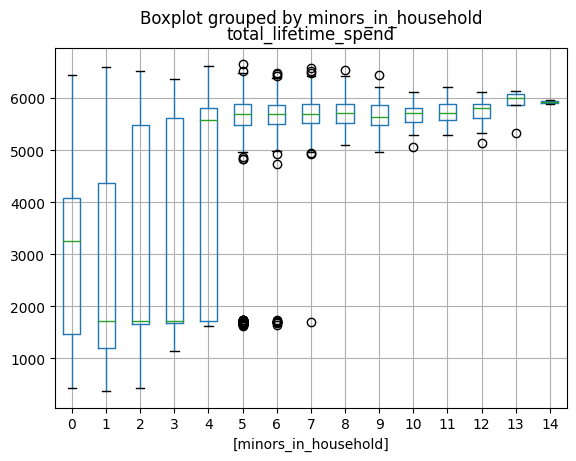

In [124]:
individuals[['total_lifetime_spend','minors_in_household']].boxplot(by='minors_in_household')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

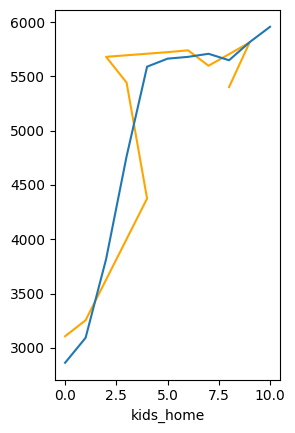

In [127]:

plt.subplot(1, 2, 1)

plt.plot(
    individuals['teens_home'].unique(), individuals.groupby(['teens_home'])['total_lifetime_spend'].mean(), color='orange'
)

plt.plot(
    individuals['kids_home'].unique(), individuals.groupby(['kids_home'])['total_lifetime_spend'].mean().plot()
)

plt.show()

> **distribuição de observações por localização** (Mapa)

In [ ]:
map_lisbon = folium.Map(location=[38.7223, -9.1393], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map_lisbon)
for index, row in customers.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(marker_cluster)

# Display the map
map_lisbon

In [ ]:
map_lisbon = folium.Map(location=[38.7223, -9.1393], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map_lisbon)
individualsfem = individuals[individuals['customer_gender'] == 1]
individualsmas = individuals[individuals['customer_gender'] == 0]
for index, row in individualsfem.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], icon=folium.Icon(color='red', icon='')).add_to(marker_cluster)
for index, row in individualsmas.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(marker_cluster)
# Display the map
map_lisbon

#### 4. Multivariate Analysis: Correlação e testes de independencia, vamos também ver se existe alguma relação entre variaveis :)

## Basket Dataset